In [2]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt 

# seaboarn lib add
import seaborn as sns

import time

%matplotlib inline


import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
    print('d')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('w')
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# ml lib
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold , cross_val_score , cross_validate , GridSearchCV
from   sklearn.tree            import DecisionTreeClassifier
from   sklearn.ensemble        import RandomForestClassifier
from   sklearn.linear_model    import LogisticRegression

from   sklearn.metrics         import accuracy_score

from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler
from   sklearn.impute          import SimpleImputer
import missingno as msno 

import graphviz

print('sklearn version - ' , sklearn.__version__)

numpy version  -  1.20.1
pandas version -  1.2.4
w
sklearn version -  0.24.1


#### 타이타닉 생존자 ML 에측 구현 [실습]

- 데이터 전처리(null 처리, 불필요한 속성 제거, 인코딩 수행)
- 모델학습 및 검증/예측/평가

- 1. 데이터 로드

In [3]:
titanic_frm = pd.read_csv('./data/titanic_train.csv')
titanic_frm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 2. 결측값 처리
- Age 평균으로 대체
- Cabin , Embarked -> 'N' 대체
- missingno 이용한 확인 및 처리

<AxesSubplot:>

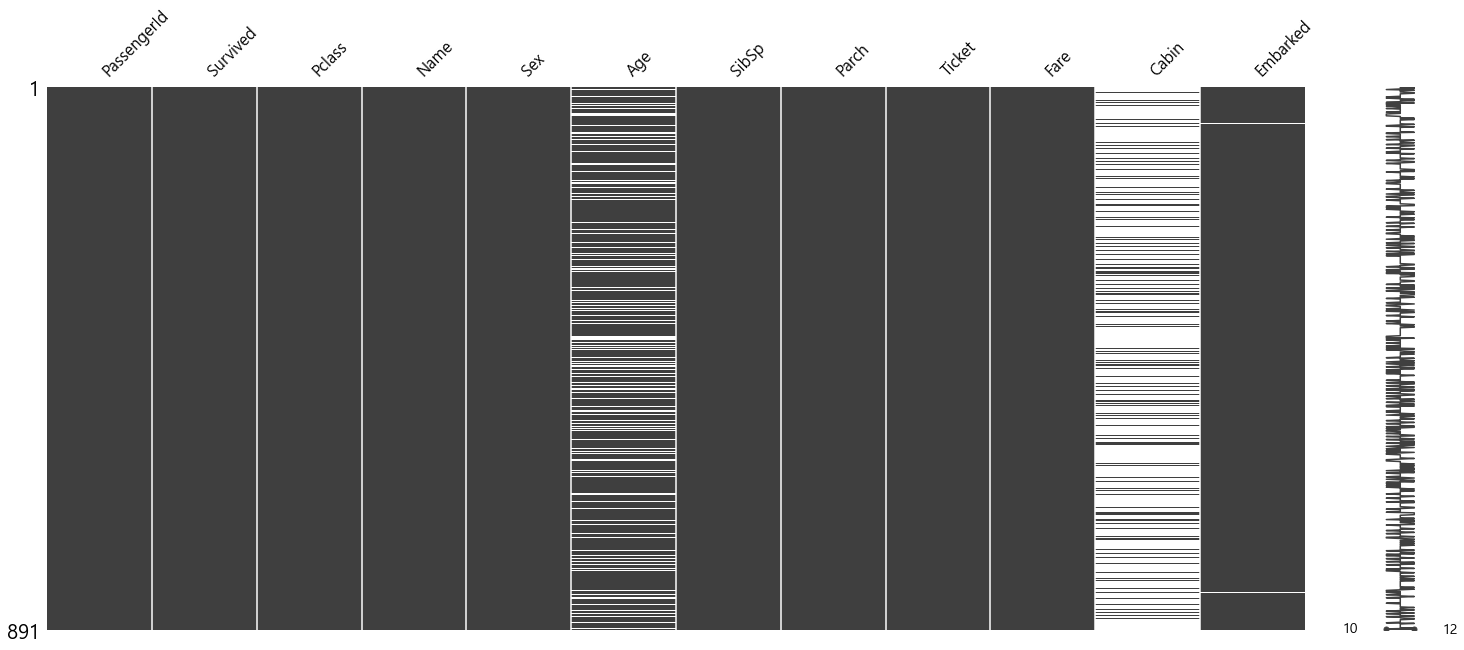

In [5]:
msno.matrix(titanic_frm)

In [6]:
print('age - 평균 ')
titanic_age_imputer = SimpleImputer(strategy = 'mean')
titanic_frm['Age'] = titanic_age_imputer.fit_transform(titanic_frm[['Age']])

age - 평균 


<AxesSubplot:>

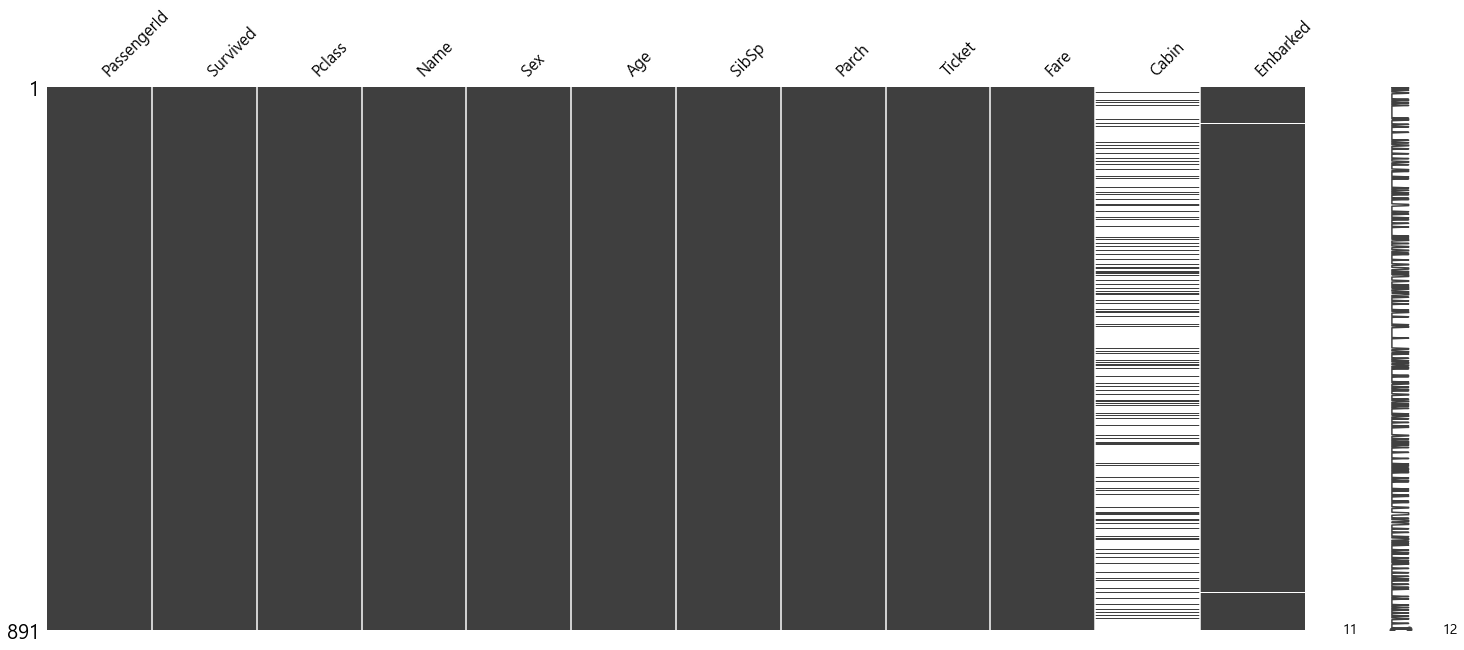

In [7]:
msno.matrix(titanic_frm)

Cabin , Embarked -> N 대체



<AxesSubplot:>

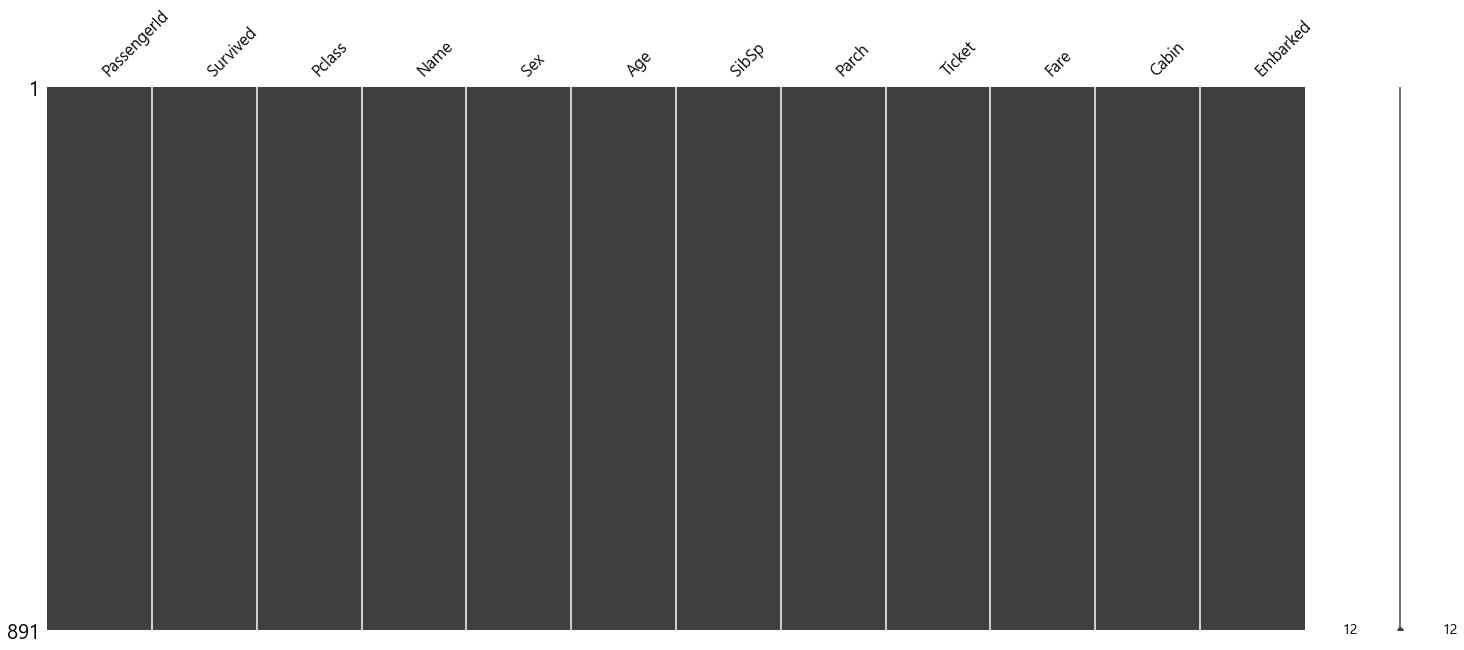

In [8]:
print('Cabin , Embarked -> N 대체')
print()
titanic_frm['Cabin'] = titanic_frm['Cabin'].fillna('N')
titanic_frm['Embarked'] = titanic_frm['Embarked'].fillna('N')
msno.matrix(titanic_frm)

- 3. 성별에 따른 생존여부 확인하기위한 barplot 시각화(seaborn)

성별에 따른 시각화, 선실별 그룹 , 누적바


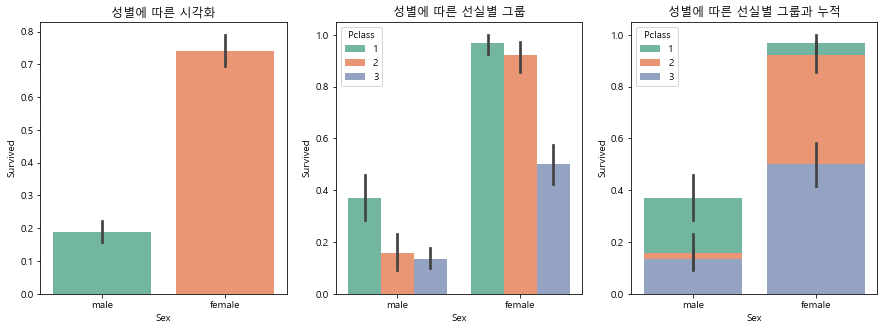

In [9]:
print('성별에 따른 시각화, 선실별 그룹 , 누적바')
fig = plt.figure(figsize = (15,5))

ax01 = fig.add_subplot(1,3,1)
ax01.set_title('성별에 따른 시각화')
sns.barplot(x='Sex' , y = 'Survived' , data = titanic_frm , ax = ax01 , palette='Set2')

ax02 = fig.add_subplot(1,3,2)
ax02.set_title('성별에 따른 선실별 그룹')
sns.barplot(x='Sex' , y = 'Survived' , data = titanic_frm , ax = ax02 , palette='Set2' , hue='Pclass')

ax03 = fig.add_subplot(1,3,3)
ax03.set_title('성별에 따른 선실별 그룹과 누적')
sns.barplot(x='Sex' , y = 'Survived' , data = titanic_frm , ax = ax03 , palette='Set2' , hue='Pclass' , dodge = False)


plt.show()
plt.close()

countplot - 


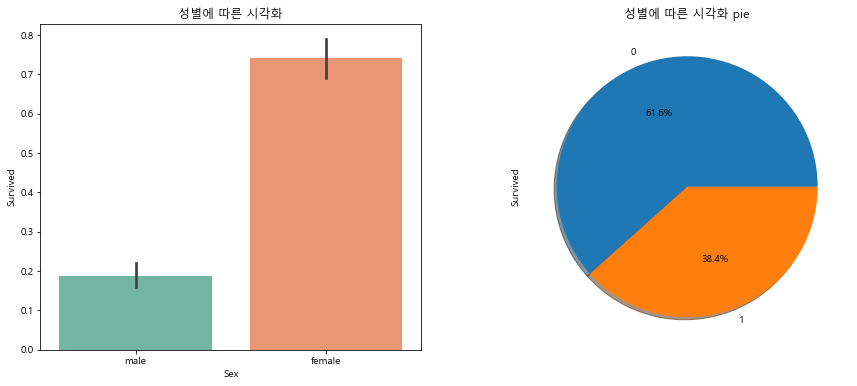

In [10]:
print('countplot - ')
fig = plt.figure(figsize = (15,6))

ax01 = fig.add_subplot(1,2,1)
ax01.set_title('성별에 따른 시각화')
sns.barplot(x='Sex' , y = 'Survived' , data = titanic_frm , ax = ax01 , palette='Set2')

ax02 = fig.add_subplot(1,2,2)
ax02.set_title('성별에 따른 시각화 pie')
titanic_frm['Survived'].value_counts().plot.pie(autopct = '%1.1f%%', ax=ax02, shadow=True)



plt.show()
plt.close()

In [11]:
print('성별에 따른 생존자 수를 비교 - groupby')
print()
titanic_frm.groupby(['Sex' , 'Survived'])['Survived'].count().to_frame()


성별에 따른 생존자 수를 비교 - groupby



Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [12]:
print('나이에 따른 생존 확률 - ')
pd.DataFrame(titanic_frm['Age'].value_counts()).T

나이에 따른 생존 확률 - 


,29.699118,24.000000,22.000000,18.000000,30.000000,28.000000,19.000000,21.000000,25.000000,36.000000,...,34.500000,23.500000,80.000000,0.670000,36.500000,53.000000,55.500000,0.920000,24.500000,70.500000
Age,177,30,27,26,25,25,25,24,23,22,...,1,1,1,1,1,1,1,1,1,1


In [13]:
print('Age 따른 연령층을 분류')
def age_category(s) :
    cat = ''
    if 0 <= s <= 9 :
        cat = '10대 이하'
    elif 10 <= s <= 19 :
        cat = '10대'
    elif 20 <= s <= 29 :
        cat = '20대'
    elif 30 <= s <= 39 :
        cat = '30대'
    elif 40 <= s <= 49 :
        cat = '40대'
    elif 50 <= s <= 59 :
        cat = '50대'
    elif 60 <= s <= 69 :
        cat = '60대'
    elif 70 <= s <= 79 :
        cat = '70대'
    else :
        
        cat = '80대 이상'
        
    return cat



Age 따른 연령층을 분류


In [14]:
titanic_frm['AgeCat'] = titanic_frm['Age'].apply(lambda x : age_category(x))

In [15]:
titanic_frm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,20대
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30대
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,20대
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30대
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,30대


나이에 따른 생존 확률



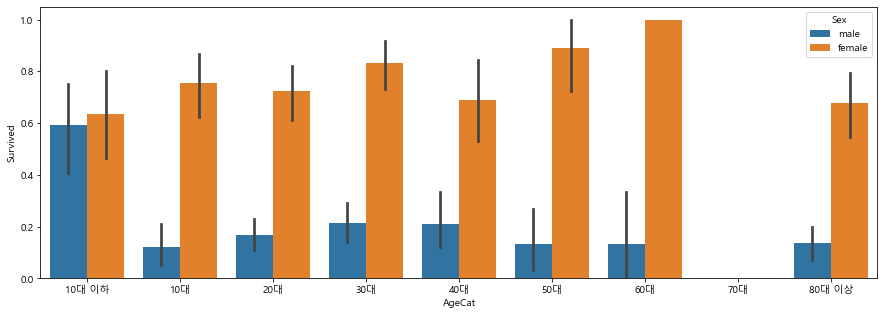

In [16]:
print('나이에 따른 생존 확률')
print()
fig = plt.figure(figsize = (15,5))


sns.barplot(x='AgeCat' , y = 'Survived' , data = titanic_frm , hue='Sex' , 
           order=['10대 이하' , '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대 이상'])

plt.show()
plt.close()

In [17]:
titanic_frm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,20대
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30대
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,20대
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30대
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,30대


In [18]:
titanic_frm.drop('AgeCat' , axis = 1 , inplace=True)
titanic_frm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [19]:
titanic_subset_frm = titanic_frm[['Survived' , 'Pclass' , 'Sex' , 'Age' , 'SibSp' , 'Parch' , 'Cabin' , 'Embarked']]
titanic_subset_frm.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,N,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,N,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,N,S


- 4. 전처리 - 레이블인코딩(Sex , Cabin , Embarked) 

In [20]:
print('Sex 레이블 인코딩 - ')
print()

encoder = LabelEncoder()
sex_labels = encoder.fit_transform(titanic_subset_frm['Sex'])
sex_labels

titanic_subset_frm['Sex'] = sex_labels
titanic_subset_frm.head()


Sex 레이블 인코딩 - 



,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,22.0,1,0,N,S
1,1,1,0,38.0,1,0,C85,C
2,1,3,0,26.0,0,0,N,S
3,1,1,0,35.0,1,0,C123,S
4,0,3,1,35.0,0,0,N,S


In [21]:
print('Cabin 레이블 인코딩 - ')
print()

# titanic_subset_frm['Cabin'].str[ : 1]
encoder = LabelEncoder()
cabin_labels = encoder.fit_transform(titanic_subset_frm['Cabin'].str[ : 1])
# cabin_labels

titanic_subset_frm['Cabin'] = cabin_labels
titanic_subset_frm.head()

Cabin 레이블 인코딩 - 



,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,22.0,1,0,7,S
1,1,1,0,38.0,1,0,2,C
2,1,3,0,26.0,0,0,7,S
3,1,1,0,35.0,1,0,2,S
4,0,3,1,35.0,0,0,7,S


In [22]:
print('Embarked 레이블 인코딩 - ')
print()

encoder = LabelEncoder()
embarked_labels = encoder.fit_transform(titanic_subset_frm['Embarked'])
# embarked_labels

titanic_subset_frm['Embarked'] = embarked_labels
titanic_subset_frm.head()


Embarked 레이블 인코딩 - 



,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,22.0,1,0,7,3
1,1,1,0,38.0,1,0,2,0
2,1,3,0,26.0,0,0,7,3
3,1,1,0,35.0,1,0,2,3
4,0,3,1,35.0,0,0,7,3


#### 학습을 위한 준비
- step01 : feature  , label 데이터 셋 추출
- step02 : 데이터 분리
- step03 : 분류모델 선정 후 학습
- step04 : 예측
- step05 : 평가

- additinal 교차검증 추가(KFold , coross_val_score , GridSearchCV 를 이용한 하이퍼 파라미터 튜닝!!)
- 피처 중요도 확인


In [23]:
# ~titanic_subset_frm.columns.isin(['Survived'])
titanic_features = titanic_subset_frm.iloc[ : , ~titanic_subset_frm.columns.isin(['Survived'])]
# titanic_features
titanic_label    = titanic_subset_frm.iloc[ : , titanic_subset_frm.columns.isin(['Survived'])]
# titanic_label

X_train , X_test , y_train , y_test = train_test_split(titanic_features , 
                                                       titanic_label , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)


In [24]:
print('model 생성 - ')
print()
dt_model = DecisionTreeClassifier(random_state = 200)
rf_model = RandomForestClassifier(random_state = 200)
lr_model = LogisticRegression(random_state = 200)

model 생성 - 



In [25]:
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print('dt model accuracy - ' , accuracy_score(y_test , dt_pred))

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print('rf model accuracy - ' , accuracy_score(y_test , rf_pred))

lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print('lr model accuracy - ' , accuracy_score(y_test , lr_pred))

dt model accuracy -  0.776536312849162
rf model accuracy -  0.8268156424581006
lr model accuracy -  0.8044692737430168


- KFold=5 를 이용한 교차검증 및 평균정확도 확인

In [27]:
kfold = KFold(n_splits=5)
cv_accuracy = []
n_iter = 0
for train_idx, test_idx in kfold.split(titanic_features):
    label_train = titanic_label.iloc[train_idx]
    label_test = titanic_label.iloc[test_idx]
    features_train =  titanic_features.iloc[train_idx,:-1]
    features_test =  titanic_features.iloc[test_idx,:-1]
    
    dt_model.fit(features_train, label_train)
    fold_pred = dt_model.predict(features_test)
    
    # 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(label_test, fold_pred),4)
    cv_accuracy.append(accuracy)

print('\n\n')
print('\n 평균 검증 정확도 : ', np.mean(cv_accuracy))






 평균 검증 정확도 :  0.79352


-  cross_val_score 를 이용한 교차검증 및 평균정확도 확인

In [52]:
# cvs_iris_dtc = DecisionTreeClassifier(random_state = 200)
scoring = cross_val_score(dt_model , titanic_features , titanic_label , scoring='accuracy' , cv=5 )
print('교차 검증별 정확도 :',scoring)
print('평균 검증 정확도 :',np.mean(scoring))

교차 검증별 정확도 : [0.74860335 0.78089888 0.82022472 0.79775281 0.83707865]
평균 검증 정확도 : 0.7969116816270165


- GridSearchCV 를 이용한 교차검증 및 평균정확도 확인

In [53]:
X_train , X_test , y_train , y_test = train_test_split(titanic_features , 
                                                       titanic_label , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)
titanic_tree = DecisionTreeClassifier()
params = {'criterion' : ['gini', 'entropy'], 
          'splitter' : ['random','best'], 
          'max_depth' : [1,2,3,4,5], 
          'min_samples_split' : [2,3,4,5,6,7]}

In [54]:
# refit = True 최적의 파라미터를 찾아서 재학습을 하겠다는 의미
grid_titanic_tree = GridSearchCV(titanic_tree, param_grid = params,cv=5,refit=True )

In [55]:
grid_titanic_tree.fit(X_train, y_train)
score_titanic_df = pd.DataFrame(grid_titanic_tree.cv_results_)
# score_titanic_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005400,0.001356,0.001800,0.000400,gini,1,2,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.762238,0.797203,0.788732,0.809859,0.774648,0.786536,0.016699,71
1,0.004401,0.001021,0.001999,0.000632,gini,1,2,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.762238,0.797203,0.788732,0.809859,0.774648,0.786536,0.016699,71
2,0.004002,0.001552,0.001799,0.000747,gini,1,3,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.762238,0.797203,0.788732,0.809859,0.774648,0.786536,0.016699,71
3,0.003799,0.000399,0.001600,0.000490,gini,1,3,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.762238,0.797203,0.788732,0.809859,0.774648,0.786536,0.016699,71
4,0.003600,0.000490,0.001801,0.000401,gini,1,4,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.762238,0.797203,0.788732,0.809859,0.774648,0.786536,0.016699,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.003999,0.000630,0.002002,0.000635,entropy,5,5,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.790210,0.825175,0.873239,0.845070,0.788732,0.824485,0.032417,12
116,0.004401,0.001360,0.001999,0.001094,entropy,5,6,random,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.790210,0.832168,0.809859,0.809859,0.739437,0.796307,0.031384,58
117,0.004199,0.001937,0.001801,0.000400,entropy,5,6,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.790210,0.825175,0.873239,0.845070,0.795775,0.825894,0.030953,6
118,0.004202,0.001470,0.001799,0.000400,entropy,5,7,random,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.790210,0.797203,0.859155,0.873239,0.767606,0.817483,0.041202,13


In [56]:
estimator = grid_titanic_tree.best_estimator_
prediction = estimator.predict(X_test)

print('answer - \n' , y_test['Survived'].values )
print()
print('guess - \n'  , prediction)
print()
print('테스트 세트의 정확도 : ', accuracy_score(y_test , prediction))

answer - 
 [0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1
 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1
 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0]

guess - 
 [1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1]

테스트 세트의 정확도 :  0.7877094972067039


- 피처 중요도 확인

feature importance -  [0.13949983 0.52811655 0.17010238 0.04470482 0.02937814 0.071824
 0.01637428]
트리 분류 모델 형성에 각 특성이 얼마나 잘 작용했는지를 평가하는 지표
해당 지표는 0~1사이의 값을 가지며 , 0이면 특성이 전혀 작용하지 않았음을 의미하고 1은 완전하게 작용하였음을 의미
특성 중요도 전체의 합은 1 이다

Pclass 	 0.1394998288600309
Sex 	 0.5281165544599128
Age 	 0.17010237641618625
SibSp 	 0.04470481696692076
Parch 	 0.02937814344263641
Cabin 	 0.0718240045086185
Embarked 	 0.016374275345694488
feature importance를 피처별로 시각화 하기



<AxesSubplot:>

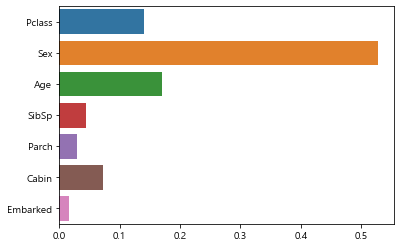

In [60]:
print('feature importance - ' , estimator.feature_importances_)
print('트리 분류 모델 형성에 각 특성이 얼마나 잘 작용했는지를 평가하는 지표')
print('해당 지표는 0~1사이의 값을 가지며 , 0이면 특성이 전혀 작용하지 않았음을 의미하고 1은 완전하게 작용하였음을 의미')
print('특성 중요도 전체의 합은 1 이다')
print()

# print( titanic_features.columns)
for name, value in zip(titanic_features , estimator.feature_importances_) :
    print(name, '\t',value)

print('feature importance를 피처별로 시각화 하기')
print()
sns.barplot(x = estimator.feature_importances_ , y = titanic_features.columns)